# Project 1 - Support Vector Machine Classification

## What will we do?
Using gradient descent, we will build a Support Vector Machine to find the optimal hyperplane that maximizes the margin between two toy data classes.

## What are some use cases for SVMs?

-Classification, regression (time series prediction, etc.), outlier detection, clustering

## How does an SVM compare to other ML algorithms?


![alt text](images/img.png)
Classifiers: (a) Logistic Regression, (b) SVM, and (c) Multi-Layer Perception (MLP)
* As a rule of thumb, SVMs are great for relatively small data sets with fewer outliers.
* Other algorithms (Random forests, deep neural networks, etc.) require more data but almost always develop robust models.
* The decision of which classifier to use depends on your dataset and the general complexity of the problem.
* "Premature optimization is the root of all evil (or at least most of it) in programming." - Donald Knuth, CS Professor (Turing award speech 1974)

## Other Examples

- Learning to use Scikit-learn's SVM function to classify images https://github.com/ksopyla/svm_mnist_digit_classification
- Pulse classification, more useful dataset
https://github.com/akasantony/pulse-classification-svm

## What is a Support Vector Machine?

It's a supervised machine learning algorithm that can be used for both classification and regression problems. But it's usually used for classification. Given two or more labeled data classes, it acts as a discriminative classifier, formally defined by an optimal hyperplane that separates all the classes. New examples mapped into that space can then be categorized based on which side of the gap they fall.

## What are Support Vectors?

![alt text](images/SvmMargin2.jpg "Logo Title Text 1")

Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set; they help us build our SVM.


## What is a hyperplane?

![alt text](images/Hyperplanes+as+decision+surfaces.jpg "Logo Title Text 1")

Geometry tells us that a hyperplane is a subspace of one dimension less than its ambient space. For instance, a hyperplane of an n-dimensional space is a flat subset with size $n − 1$. By its nature, it separates the space in half.

## Linear vs nonlinear classification?

Sometimes our data is linearly separable. That means for N classes with M features. We can learn a mapping that is a linear combination. (like $y = mx + b$). Or even a multidimensional hyperplane ($y = x + z + b + q$). No matter how many dimensions/features a set of classes have, we can represent the mapping using a linear function.

But sometimes it is not. Like if there was a quadratic mapping. Luckily for us, SVMs can efficiently perform a non-linear classification using what is called the kernel trick.

![alt text](images/1_mCwnu5kXot6buL7jeIafqQ.png "Logo Title Text 1")

More on this as a Bonus question comes at the end of notebook.

All right, let's get to the building!

# Instructions

In this assignment, you will implement a support vector machine (SVM) from scratch, and you will use your implementation for multiclass classification on the MNIST dataset.


In `implementation.py` implement the SVM class. In the fit function, use `scipy.minimize` ([see documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)) to solve the constrained optimization problem:

$\begin{align*}
& \underset{a}{\text{maximize}}& & \sum_{i=1}^{n}a_{i} - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}a_{i}a_{j}y_{i}y_{j}(x_{i}\cdot x_{j}) \\
& \text{subject to}& & a_{i} \ge 0, i=1,\ldots, n \\
& & & \sum_{i=1}^{n}a_{i}y_{i} = 0
\end{align*}$

__Note__: An SVM is a convex optimization problem. Using  to solve the equation above will be computationally expensive given larger datasets. [CS 168 Convex Optimization](https://www.cs.tufts.edu/t/courses/description/spring2023/CS/168-01) is a course to take later if interested in optimization and the mathematics and intuition that drives it.

In [1]:
import numpy as np
import pandas as pd

from scipy.io import loadmat
from implementation import SVM, linear_kernel, nonlinear_kernel
# from solution import SVM, linear_kernel, nonlinear_kernel
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## Step 1 - Get Data

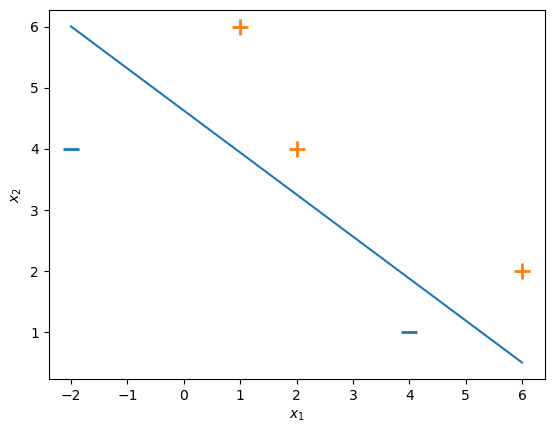

In [2]:
# Input data - of the form [Bias term, x_1 value, x_2 value]
X = np.array([
    [1, -2, 4,],
    [1, 4, 1,],
    [1, 1, 6,],
    [1, 2, 4,],
    [1, 6, 2,],
])

# Associated output labels - first 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

# Let's plot these examples on a 2D graph!
# Plot the negative samples (the first 2)
plt.scatter(X[:,1][y==-1], X[:,2][y==-1], s=120, marker='_', linewidths=2)
# Plot the positive samples (the last 3)
plt.scatter(X[:,1][y==1], X[:,2][y==1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is separating the two classes.
# we'll two points and draw the line between them (naive guess)
plt.plot([-2,6],[6,0.5])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

### SVM basics
SVM using scikit-learn.

In [3]:
result = SVC(kernel = "linear")
result.fit(X, y.ravel())

print("scikit-learn indices of support vectors:", result.support_)

scikit-learn indices of support vectors: [0 1 3 4]


## Implement and test SVM to sklearn's version (20 points)
Compare the indices of support vectors from scikit-lean with `implementation.py` using toy data.

In [4]:
# TODO: implement SVM, along with linear_kernel

result = SVC(kernel = "linear")
result.fit(X, y)

print("scikit-learn indices of support vectors:", result.support_)

svm = SVM(kernel = linear_kernel)
svm.fit(X, y)

scikit-learn indices of support vectors: [0 1 3 4]


In [5]:
print("implementation.py indices of support vectors:", \
      np.array(range(y.shape[0]))[svm.a > 1e-8])

if (result.support_ != np.array(range(y.shape[0]))[svm.a > 1e-8]).all():
    raise Exception("The calculation is wrong")

implementation.py indices of support vectors: [0 1 3 4]


### Compare the weights assigned to the features from scikit-lean with `implementation.py`.

In [6]:
#TODO - other sections were done for you, specify the variables to print, find the difference, and check it is within reasonable error from that of sklearn's version.
# print("scikit-learn weights assigned to the features:", VAR)
# print("implementation.py weights assigned to the features:", VAR)
print("scikit-learn weights assigned to the features:", result.coef_[0])
print("implementation.py weights assigned to the features:", svm.w)

diff = abs(result.coef_[0] - svm.w) #TODO
if (diff > 1e-3).any():
    raise Exception("The calculation is wrong")

scikit-learn weights assigned to the features: [0.         0.5        0.99969451]
implementation.py weights assigned to the features: [3.63598041e-15 4.99918798e-01 1.00003868e+00]


### Compare the bias weight from scikit-lean with `implementation.py`.

In [7]:
print("scikit-learn bias weight:", result.intercept_)
print("implementation.py bias weight:", svm.b)

diff = abs(result.intercept_ - svm.b)
if (diff > 1e-3).all():
    raise Exception("The calculation is wrong")

scikit-learn bias weight: [-3.99915989]
implementation.py bias weight: -3.9999033534632633


### Compare the predictions from scikit-lean with `implementation.py`.

In [8]:
X_test = np.array([
    [4, 4, -1],
    [1, 3, -1]
    ])
print("scikit-learn predictions:", result.predict(X_test))
print("implementation.py predictions:", svm.predict(X_test))

if (svm.predict(X_test) != result.predict(X_test)).all():
    raise Exception("The calculation is wrong")

scikit-learn predictions: [-1 -1]
implementation.py predictions: [-1 -1]


### Using SKLearns SVM (*one-versus-the-rest*)

You can load the data with `scipy.io.loadmat`, which will return a Python dictionary containing the test and train data and labels.

In [9]:
mnist = loadmat('data/MNIST.mat')
train_samples = mnist['train_samples']
train_samples_labels = mnist['train_samples_labels']
test_samples = mnist['test_samples']
test_samples_labels = mnist['test_samples_labels']
# Flatten the labels to 1D arrays
train_samples_labels = train_samples_labels.ravel()
test_samples_labels = test_samples_labels.ravel()

## Explore the MNIST dataset
Explore the MNIST dataset:


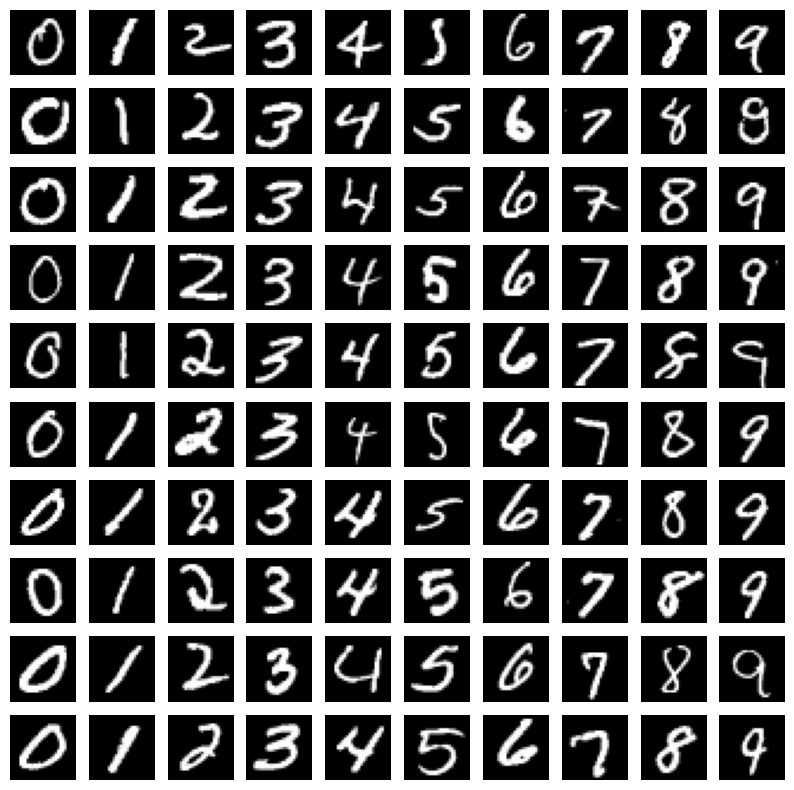

Class 0: 382 samples
Class 1: 451 samples
Class 2: 410 samples
Class 3: 413 samples
Class 4: 417 samples
Class 5: 347 samples
Class 6: 394 samples
Class 7: 412 samples
Class 8: 373 samples
Class 9: 401 samples


In [10]:
# TODO: Visualize samples of each class
# TODO: Display counts of each class
def visualize_samples(data, labels, num_samples=10):
    fig, axes = plt.subplots(num_samples, 10, figsize=(10, num_samples))
    for i in range(10):
        idxs = np.where(labels == i)[0]
        for j in range(num_samples):
            axes[j, i].imshow(data[idxs[j]].reshape(28, 28), cmap = 'gray')
            axes[j, i].axis('off')
    plt.show()

def display_counts(labels):
    unique, counts = np.unique(labels, return_counts=True)
    for label, count in zip(unique, counts):
        print(f"Class {label}: {count} samples")

# Visualize samples of each class
visualize_samples(train_samples, train_samples_labels)

# Display counts of each class
display_counts(train_samples_labels)

### *one-versus-the-rest* (15 Points) and analysis
Using your implementation, compare multiclass classification performance of *one-versus-the-rest*

**Create your own implementation of *one-versus-the-rest* and *one-versus-one*. Do not use sklearns multiclass SVM.**

In [11]:
# TODO loop over classes training one_versus_the_rest()
# TODO save all the prediction probability by predict_prob() for the following function
# Hint: svm = SVC(kernel="linear", probability=True)
def one_versus_the_rest(labels, number):
    '''
    labels: 1D array of labels
    number: the number to be classified as 1, all other numbers are classified as -1
    return: 1D array of labels
    '''
    new_labels = labels.copy().astype(int)
    new_labels[labels == number] = 1
    new_labels[labels != number] = -1
    return new_labels

train_predictions = list()
test_predictions = list()
for i in range(10): # loop over classes
    X_train = train_samples.copy()
    X_test = test_samples.copy()
    y_train = one_versus_the_rest(train_samples_labels, i)
    y_test = one_versus_the_rest(test_samples_labels, i) 
    # train svm
    svm = SVC(kernel = "linear", probability=True)
    svm.fit(X_train, y_train)
    # get the prediction probability
    train_predictions.append(svm.predict_proba(X_train)[:,1])
    test_predictions.append(svm.predict_proba(X_test)[:,1])
    
    print("{}-versus-the-rest, train accuracy: {}".format(i, svm.score(X_train, y_train)))
    print("{}-versus-the-rest, test accuracy: {}".format(i, svm.score(X_test, y_test)))

0-versus-the-rest, train accuracy: 0.99475
0-versus-the-rest, test accuracy: 0.985
1-versus-the-rest, train accuracy: 0.9905
1-versus-the-rest, test accuracy: 0.994
2-versus-the-rest, train accuracy: 0.97825
2-versus-the-rest, test accuracy: 0.97
3-versus-the-rest, train accuracy: 0.9745
3-versus-the-rest, test accuracy: 0.962
4-versus-the-rest, train accuracy: 0.9815
4-versus-the-rest, test accuracy: 0.977
5-versus-the-rest, train accuracy: 0.97425
5-versus-the-rest, test accuracy: 0.966
6-versus-the-rest, train accuracy: 0.98875
6-versus-the-rest, test accuracy: 0.98
7-versus-the-rest, train accuracy: 0.985
7-versus-the-rest, test accuracy: 0.971
8-versus-the-rest, train accuracy: 0.9635
8-versus-the-rest, test accuracy: 0.951
9-versus-the-rest, train accuracy: 0.965
9-versus-the-rest, test accuracy: 0.961


### Determine the accuracy

In [12]:
train_accuracy = sum(np.argmax(np.array(train_predictions), axis = 0) == train_samples_labels) / len(train_samples_labels)
test_accuracy = sum(np.argmax(np.array(test_predictions), axis = 0) == test_samples_labels) / len(test_samples_labels)
print("Train accuracy: {:.2f}".format(100 * train_accuracy))
print("Test accuracy: {:.2f}".format(100 * test_accuracy))

Train accuracy: 91.88
Test accuracy: 88.50


### The parameter $C>0$ controls the tradeoff between the size of the margin and the slack variable penalty. It is analogous to the inverse of a regularization coefficient. Include in your report a brief discussion of how you found an appropriate value.

In [13]:
# Hint: Try using np.logspace for hyperparameter tuning
# TODO: Find an appropriate value of C. 
train_accuracies = list()
test_accuracies = list()

for c in np.logspace(-5, 5, 51): # try different values of C
    train_predictions = list()
    test_predictions = list()
    for i in range(10): # loop over classes
        X_train = train_samples.copy()
        X_test = test_samples.copy()
        y_train = one_versus_the_rest(train_samples_labels, i)
        y_test = one_versus_the_rest(test_samples_labels, i)

        svm = SVC(kernel = "linear", C = c, probability = True)
        svm.fit(X_train, y_train)

        train_predictions.append(svm.predict_log_proba(X_train)[:,1])
        test_predictions.append(svm.predict_log_proba(X_test)[:,1])

    train_accuracy = sum(np.argmax(np.array(train_predictions), axis=0) == train_samples_labels) / len(train_samples_labels)
    test_accuracy = sum(np.argmax(np.array(test_predictions), axis=0) == test_samples_labels) / len(test_samples_labels)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

### Provide details on how you found an appropriate value.

**_Answer_**:

To find an appropriate value for the hyperparameter C, we performed a grid search using a logarithmic scale from 1e-5 to 1e5 (51 values). For each value of C, we trained an SVM with a linear kernel using one-versus-the-rest multiclass classification. We then computed the train and test accuracies for each value of C.

Once the grid search is complete, we will be able to analyze the train and test accuracies to find an appropriate value for C. We can plot the train and test accuracies as a function of C to find the appropriate value. The goal is to find a value of C that results in a good balance between the training and testing accuracies, without overfitting or underfitting.

By analyzing the plot, we can identify the range or specific value of C where the train and test accuracies are high and the gap between them is relatively small. This value or range will be considered an appropriate value for C, as it strikes a good balance between model complexity and generalization performance.

### Plot accuracies for train and test using logspace for x-axis (i.e., $C$ values)

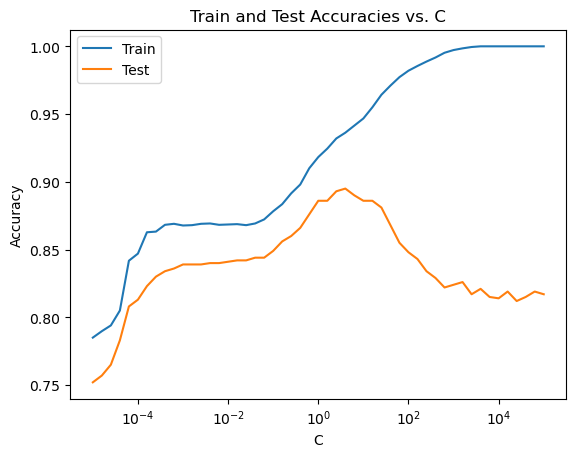

In [14]:
# TODO: Plot the result.
plt.plot(np.logspace(-5,5,51), train_accuracies, label='Train')
plt.plot(np.logspace(-5,5,51), test_accuracies, label='Test')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train and Test Accuracies vs. C")
plt.show()

### What does this graph tell us about the importance of our C value?

\# TODO: Analyze the plot above: 

**_Answer_**:

By analyzing the above plot, we can see that as the value of C increases, the test accuracy generally increases, which is expected. However, we can see that the test accuracy achieves optimal at a value of C around 1e+00 and starts to decrease. This is because the test accuracy is already high enough when C is around 1e+00, and increasing C further will result in overfitting. We can also observe that the gap between the train and test accuracies is relatively small for values of C around 1e+00, which is desirable since this range of C results in a good balance between the training and testing accuracies, without overfitting or underfitting.

To summarize, an appropriate value for C can be found by analyzing the train and test accuracies as C varies. In this case, a value of C around 1e+00 appears to provide a good balance between maximizing accuracy and minimizing overfitting. However, it's important to note that the optimal value of C may vary depending on the specific dataset and problem.

### (10 Points)
In addition to calculating percent accuracy, generate multiclass [confusion matrices](https://en.wikipedia.org/wiki/confusion_matrix) as part of your analysis.

In [15]:
model1_train_predictions = list()
model1_test_predictions = list()
# TODO
for i in range(10):
    X_train = train_samples.copy()
    X_test = test_samples.copy()
    y_train = one_versus_the_rest(train_samples_labels, i)
    y_test = one_versus_the_rest(test_samples_labels, i)

    svm = SVC(kernel="linear", probability=True)
    svm.fit(X_train, y_train)

    model1_train_predictions.append(svm.predict_log_proba(X_train)[:,1])
    model1_test_predictions.append(svm.predict_log_proba(X_test)[:,1])

    print("{}-versus-the-rest, train accuracy: {}".format(i, svm.score(X_train, y_train)))
    print("{}-versus-the-rest, test accuracy: {}".format(i, svm.score(X_test, y_test)))

model1_train_accuracy = sum(np.argmax(np.array(model1_train_predictions), axis = 0) == train_samples_labels) / len(train_samples_labels)
model1_test_accuracy = sum(np.argmax(np.array(model1_test_predictions), axis = 0) == test_samples_labels) / len(test_samples_labels)
print("Linear SVM Train accuracy: {:.2f}".format(100 * model1_train_accuracy))
print("Linear SVM Test accuracy: {:.2f}".format(100 * model1_test_accuracy))

svm_train_predictions = np.argmax(np.array(model1_train_predictions), axis = 0)
svm_test_predictions = np.argmax(np.array(model1_test_predictions), axis = 0)
# Calculate confusion matrices
model1_train_confusion_matrix = confusion_matrix(train_samples_labels, svm_train_predictions)
model1_test_confusion_matrix = confusion_matrix(test_samples_labels, svm_test_predictions)
# Display confusion matrices
print("Linear SVM Train Confusion Matrix:")
print(model1_train_confusion_matrix)
print("\nLinear SVM Test Confusion Matrix:")
print(model1_test_confusion_matrix)

0-versus-the-rest, train accuracy: 0.99475
0-versus-the-rest, test accuracy: 0.985
1-versus-the-rest, train accuracy: 0.9905
1-versus-the-rest, test accuracy: 0.994
2-versus-the-rest, train accuracy: 0.97825
2-versus-the-rest, test accuracy: 0.97
3-versus-the-rest, train accuracy: 0.9745
3-versus-the-rest, test accuracy: 0.962
4-versus-the-rest, train accuracy: 0.9815
4-versus-the-rest, test accuracy: 0.977
5-versus-the-rest, train accuracy: 0.97425
5-versus-the-rest, test accuracy: 0.966
6-versus-the-rest, train accuracy: 0.98875
6-versus-the-rest, test accuracy: 0.98
7-versus-the-rest, train accuracy: 0.985
7-versus-the-rest, test accuracy: 0.971
8-versus-the-rest, train accuracy: 0.9635
8-versus-the-rest, test accuracy: 0.951
9-versus-the-rest, train accuracy: 0.965
9-versus-the-rest, test accuracy: 0.961
Linear SVM Train accuracy: 91.83
Linear SVM Test accuracy: 88.50
Linear SVM Train Confusion Matrix:
[[373   0   1   0   0   1   1   0   4   2]
 [  0 434   3   0   0   5   1   0   7

**_Analysis_**:

The SVM with a linear kernel achieved a train accuracy of 91.83% and a test accuracy of 88.50%. This is a overall good result, as the model is able to generalize well to new data.

Based on the accuracies and confusion matrices, classes of label 3 and 8 are a bit more difficult to classify than other classes.

### Evaluation (15 points)

Now we will report our results and compare to other algorithms. Usually compare with a handful
Logisitic regression

**Create your own implementation of *one-versus-the-rest* and *one-versus-one*. Do not use sklearns multiclass Logistic Regression.**

In [16]:
# train_predictions = list()
# test_predictions = list()
# TODO
model2_train_predictions = list()
model2_test_predictions = list()
for i in range(10):
    X_train = train_samples.copy()
    X_test = test_samples.copy()
    y_train = one_versus_the_rest(train_samples_labels, i)
    y_test = one_versus_the_rest(test_samples_labels, i)

    svm = LogisticRegression()
    svm.fit(X_train, y_train)

    model2_train_predictions.append(svm.predict_proba(X_train)[:,1])
    model2_test_predictions.append(svm.predict_proba(X_test)[:,1])

    print("{}-versus-the-rest, train accuracy: {}".format(i, svm.score(X_train, y_train)))
    print("{}-versus-the-rest, test accuracy: {}".format(i, svm.score(X_test, y_test)))

model2_train_accuracy = sum(np.argmax(np.array(model2_train_predictions), axis=0) == train_samples_labels) / len(train_samples_labels)
model2_test_accuracy = sum(np.argmax(np.array(model2_test_predictions), axis=0) == test_samples_labels) / len(test_samples_labels)
print("Logistic Regression Train accuracy: {:.2f}".format(100 * model2_train_accuracy))
print("Logistic Regression Test accuracy: {:.2f}".format(100 * model2_test_accuracy))

lr_train_predictions = np.argmax(np.array(model2_train_predictions), axis = 0)
lr_test_predictions = np.argmax(np.array(model2_test_predictions), axis = 0)
# Calculate confusion matrices
model2_train_confusion_matrix = confusion_matrix(train_samples_labels, lr_train_predictions)
model2_test_confusion_matrix = confusion_matrix(test_samples_labels, lr_test_predictions)
# Display confusion matrices
print("Logistic Regression Train Confusion Matrix:")
print(model2_train_confusion_matrix)
print("\nLogistic Regression Test Confusion Matrix:")
print(model2_test_confusion_matrix)

0-versus-the-rest, train accuracy: 0.99125
0-versus-the-rest, test accuracy: 0.985
1-versus-the-rest, train accuracy: 0.98725
1-versus-the-rest, test accuracy: 0.993
2-versus-the-rest, train accuracy: 0.96925
2-versus-the-rest, test accuracy: 0.967
3-versus-the-rest, train accuracy: 0.968
3-versus-the-rest, test accuracy: 0.959
4-versus-the-rest, train accuracy: 0.977
4-versus-the-rest, test accuracy: 0.971
5-versus-the-rest, train accuracy: 0.95925
5-versus-the-rest, test accuracy: 0.945
6-versus-the-rest, train accuracy: 0.9815
6-versus-the-rest, test accuracy: 0.976
7-versus-the-rest, train accuracy: 0.98025
7-versus-the-rest, test accuracy: 0.969
8-versus-the-rest, train accuracy: 0.9525
8-versus-the-rest, test accuracy: 0.946
9-versus-the-rest, train accuracy: 0.95475
9-versus-the-rest, test accuracy: 0.961
Logistic Regression Train accuracy: 89.65
Logistic Regression Test accuracy: 87.00
Logistic Regression Train Confusion Matrix:
[[371   0   1   1   0   1   4   0   4   0]
 [  0 

**_Analysis_**:

The logistic regression model achieved a train accuracy of 89.65% and a test accuracy of 87.00%. This is generally a good result because the model is able to generalize well to new data while achieving a relatively high training and test accuracy.

Looking at the confusion matrices, we can see that the performance on classes of label 3,5 and 8 are a bit worse than other classes. This is likely due to the fact that these classes are more similar to each other than other classes, which makes them more difficult to classify.

### Create a table comparing model accuracy on train and test data.

In [17]:
# TODO Create a table comparing model accuracy on train and test data.

# Create a dictionary containing the train and test accuracies for each model
accuracy_data = {
    'Model': ['Linear SVM', 'Logistic Regression'],
    'Train Accuracy': [100*model1_train_accuracy, 100*model2_train_accuracy],
    'Test Accuracy': [100*model1_test_accuracy, 100*model2_test_accuracy]
}

# Create a DataFrame using the accuracy data
accuracy_df = pd.DataFrame(accuracy_data)

# Display the DataFrame
print(accuracy_df)


# # Define the train and test accuracies
# train_accuracies = [0.99125, 0.98725, 0.96925, 0.968, 0.977, 0.95925, 0.9815, 0.98025, 0.9525, 0.95475]
# test_accuracies = [0.985, 0.993, 0.967, 0.959, 0.971, 0.945, 0.976, 0.969, 0.946, 0.961]

# # Create a DataFrame
# accuracy_table = pd.DataFrame({'Class': list(range(10)),
#                                'Train Accuracy': train_accuracies,
#                                'Test Accuracy': test_accuracies})

# # Convert accuracies to percentages
# accuracy_table['Train Accuracy'] = (accuracy_table['Train Accuracy'] * 100).round(2)
# accuracy_table['Test Accuracy'] = (accuracy_table['Test Accuracy'] * 100).round(2)

# # Display the table
# print(accuracy_table)


# data = {'Class': list(range(10)),
#         'Train Accuracy': [99.13, 98.73, 96.93, 96.80, 97.70, 95.93, 98.15, 98.03, 95.25, 95.48],
#         'Test Accuracy': [98.50, 99.30, 96.70, 95.90, 97.10, 94.50, 97.60, 96.90, 94.60, 96.10]}

# df = pd.DataFrame(data)
# df.set_index('Class', inplace=True)
# df['Overall'] = [''] * 10
# df.loc[9, 'Overall'] = f"Train: {89.65}"
# df.loc[0, 'Overall'] = f"Test: {87.00}"
# print(df)

                 Model  Train Accuracy  Test Accuracy
0           Linear SVM          91.825           88.5
1  Logistic Regression          89.650           87.0


**_Analysis_**:

The SVM with a linear kernel achieved a train accuracy of 91.83% and a test accuracy of 88.50%. This is a overall good result, as the model is able to generalize well to new data.

The logistic regression model achieved a train accuracy of 89.65% and a test accuracy of 87.00%. This is generally a good result because the model is able to generalize well to new data while achieving a relatively high training and test accuracy.

Comparing the two models, we can see that the SVM with a linear kernel achieved slightly higher train and test accuracies than the logistic regression model. This is likely due to the fact that the SVM with a linear kernel is a more complex model than the logistic regression model, which allows it to achieve a higher accuracy. 

### Create 9 graphs (one for each label) with two ROC curves (one for each model).


In [18]:
model1_train_predictions_array = np.array(model1_train_predictions)
model1_test_predictions_array = np.array(model1_test_predictions)
model2_train_predictions_array = np.array(model2_train_predictions)
model2_test_predictions_array = np.array(model2_test_predictions)

print(model1_train_predictions_array.shape)
print(model1_test_predictions_array.shape)
print(model2_train_predictions_array.shape)
print(model2_test_predictions_array.shape)

(10, 4000)
(10, 1000)
(10, 4000)
(10, 1000)


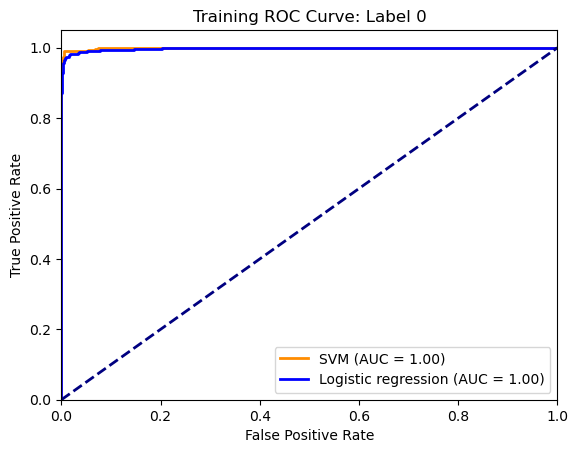

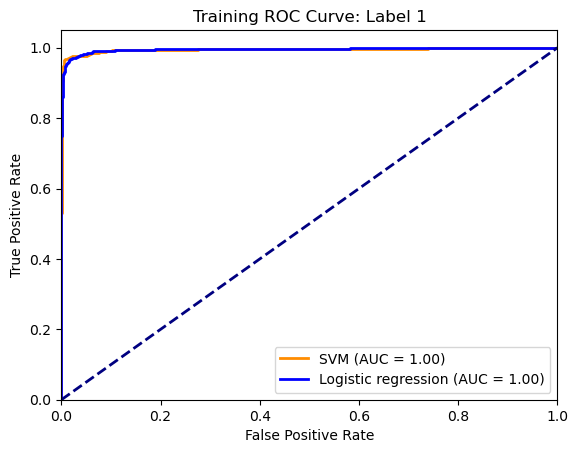

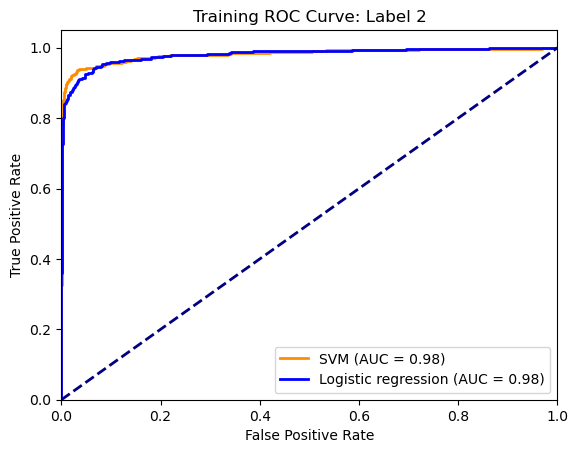

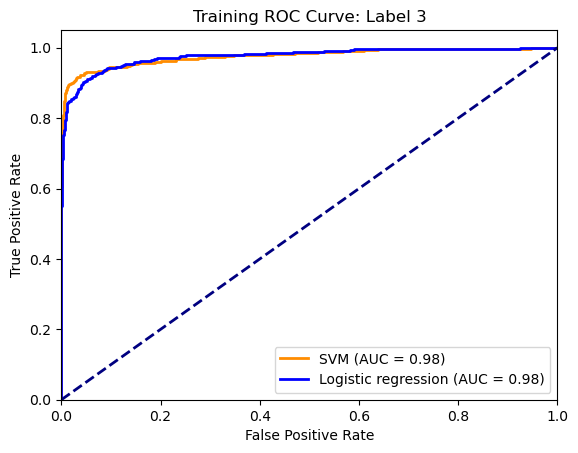

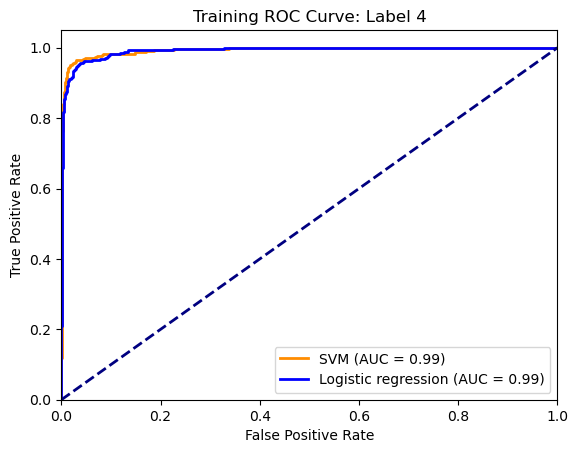

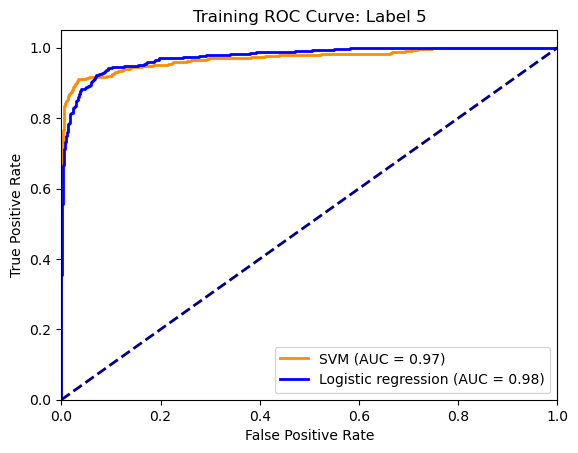

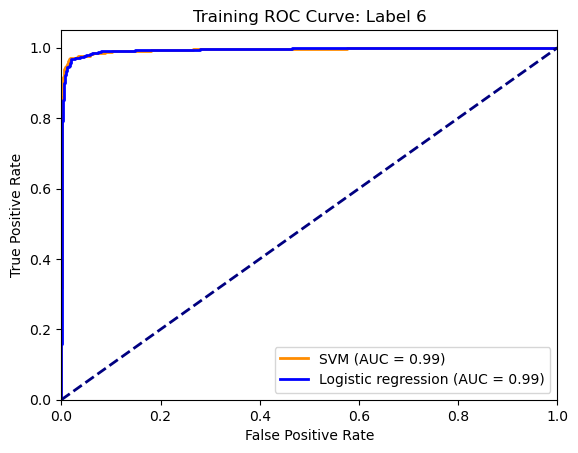

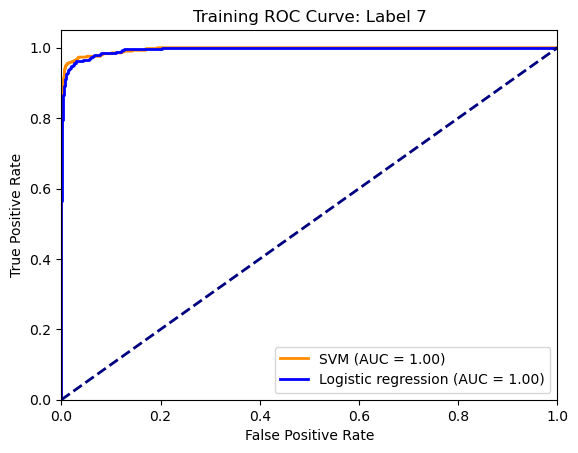

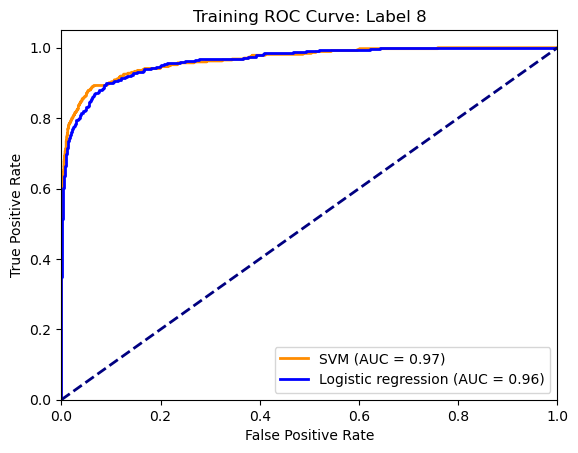

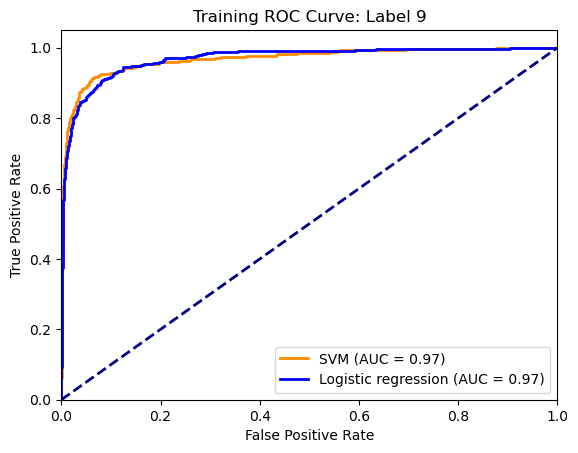

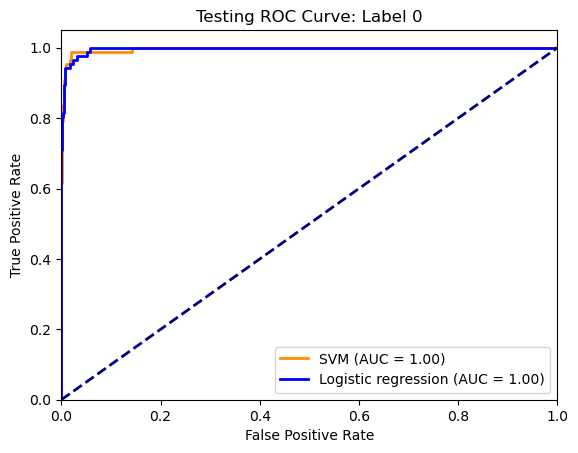

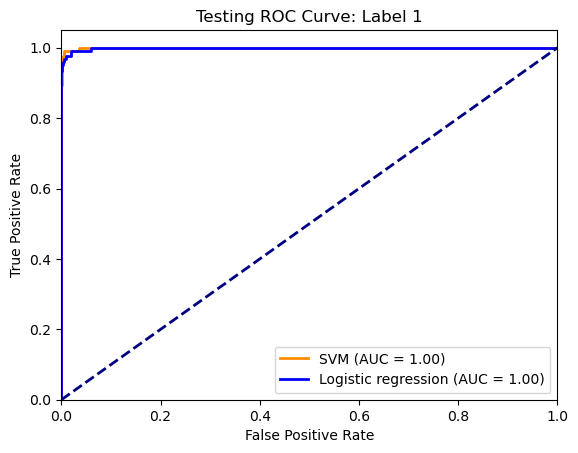

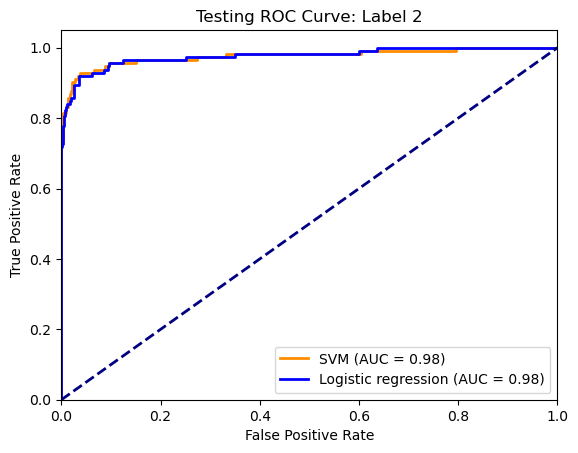

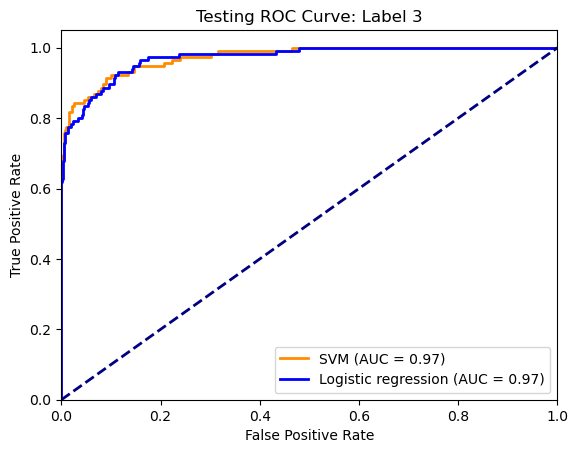

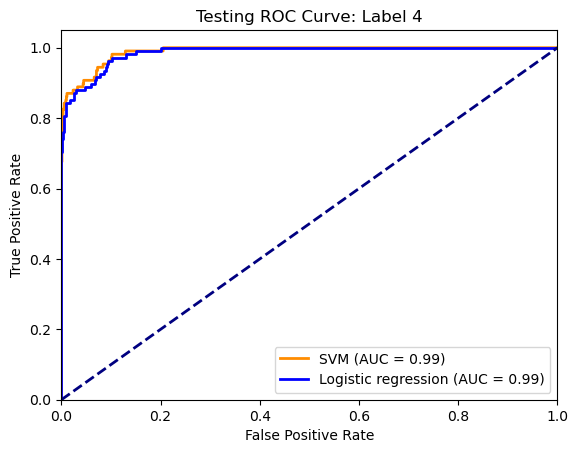

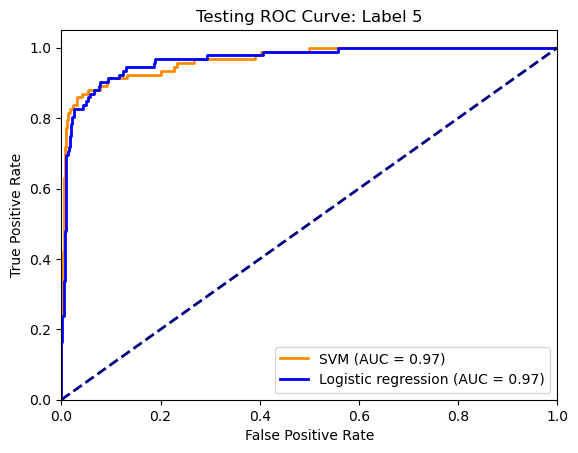

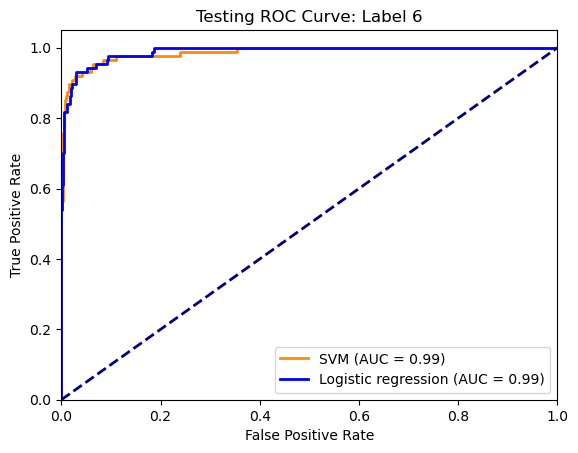

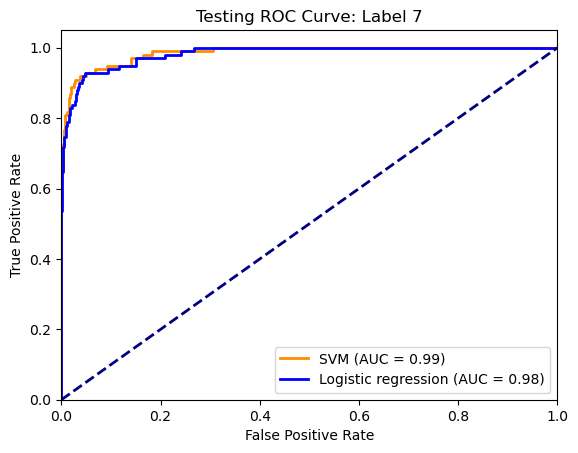

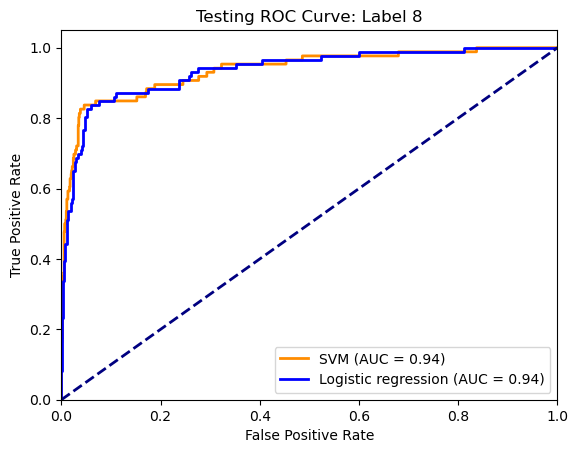

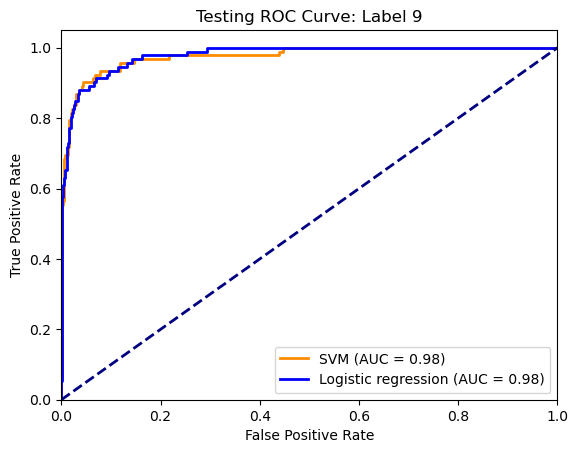

In [19]:
# TODO
from sklearn.metrics import roc_curve, auc

def plot_train_roc_curves(y_true, y_pred1, y_pred2, label):
    fpr1, tpr1, _ = roc_curve(y_true, y_pred1)
    roc_auc1 = auc(fpr1, tpr1)
    
    fpr2, tpr2, _ = roc_curve(y_true, y_pred2)
    roc_auc2 = auc(fpr2, tpr2)

    plt.figure()
    plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='SVM (AUC = %0.2f)' % roc_auc1)
    plt.plot(fpr2, tpr2, color='blue', lw=2, label='Logistic regression (AUC = %0.2f)' % roc_auc2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Training ROC Curve: Label {}'.format(label))
    plt.legend(loc="lower right")
    plt.show()

def plot_test_roc_curves(y_true, y_pred1, y_pred2, label):
    fpr1, tpr1, _ = roc_curve(y_true, y_pred1)
    roc_auc1 = auc(fpr1, tpr1)
    
    fpr2, tpr2, _ = roc_curve(y_true, y_pred2)
    roc_auc2 = auc(fpr2, tpr2)

    plt.figure()
    plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='SVM (AUC = %0.2f)' % roc_auc1)
    plt.plot(fpr2, tpr2, color='blue', lw=2, label='Logistic regression (AUC = %0.2f)' % roc_auc2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Testing ROC Curve: Label {}'.format(label))
    plt.legend(loc="lower right")
    plt.show()

# Plot the ROC curves for the train data
for label in range(10):
    y_true = one_versus_the_rest(train_samples_labels, label)
    y_pred1 = model1_train_predictions_array[label, :]
    y_pred2 = model2_train_predictions_array[label, :]
    plot_train_roc_curves(y_true, y_pred1, y_pred2, label)

# Plot the ROC curves for the test data
for label in range(10):
    y_true = one_versus_the_rest(test_samples_labels, label)
    y_pred1 = model1_test_predictions_array[label, :]
    y_pred2 = model2_test_predictions_array[label, :]
    plot_test_roc_curves(y_true, y_pred1, y_pred2, label)


# # Loop over each label
# for i in range(10):
#     # Train the SVM
#     svm = SVM(kernel=linear_kernel)
#     svm.fit(train_samples, one_versus_the_rest(train_samples_labels, i))
    
#     # Train logistic regression
#     lr = LogisticRegression()
#     lr.fit(train_samples, one_versus_the_rest(train_samples_labels, i))

#     # Compute ROC curve and area under the curve (AUC) for SVM
#     fpr_svm, tpr_svm, _ = roc_curve(one_versus_the_rest(test_samples_labels, i), svm.predict(test_samples))
#     roc_auc_svm = auc(fpr_svm, tpr_svm)

#     # Compute ROC curve and area under the curve (AUC) for logistic regression
#     fpr_lr, tpr_lr, _ = roc_curve(one_versus_the_rest(test_samples_labels, i), lr.predict_proba(test_samples)[:, 1])
#     roc_auc_lr = auc(fpr_lr, tpr_lr)

#     # Plot ROC curves
#     plt.figure()
#     plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
#     plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve for Label %d' % i)
#     plt.legend(loc="lower right")
#     plt.show()

**_Analysis_**:

Looking at the ROC curves of the two models for all classes, we can see that both the SVM with a linear kernel and the logistic regression model perform similarly well on all classes. They both have almost 0.95+ AUC for all classes. This is a good result because it means that the models are able to distinguish between the positive and negative classes well. 

# BONUS (+5 points): Non-linear kernel
## Intuition Behind Kernels
The SVM classifier obtained by solving the convex Lagrange dual of the primal max-margin SVM formulation is as follows:

$$ f(x) = \sum_{i=1}^N\alpha_i\cdot y_i\cdot\mathrm{K}(x,x_i)+b,$$

where $N$ is the number of support vectors.

If you know the intuition behind a linear discriminant function, the non-parametric SVM classifier above is very easy to understand. Instead of imagining the original features of each data point, consider a transformation to a new feature space where the data point has $N$ features, one for each support vector. The value of the $i^{th}$ feature is equal to the value of the kernel between the $i^{th}$ support vector and the data point is classified. The original (possibly non-linear) SVM classifier is like any other linear discriminant in this space.

Note that after the transformation, the original features of the data point are irrelevant. Its dot products with support vectors (special data points chosen by the SVM optimization algorithm) represent it only. One of my professors used a loose analogy while explaining this idea: A person has seen lakes, rivers, streams, fords, etc., but has never seen the sea. How would you explain to this person what a sea is? By relating the amount of water in an ocean to that found in a water body, the person already knows, etc.

In some instances, like the RBF kernel, defining the transformed features in terms of the original features of a data point leads to an infinite-dimensional representation. Unfortunately, though this an awe-inspiring fact often mentioned while explaining how powerful SVMs are, it drops in only after repeated encounters with the idea ranging from introductory machine learning to statistical learning theory.


## Intuition Behind Gaussian Kernels

The Gaussian/RBF kernel is as follows:

$$ \mathrm{K}(x,y)=exp(−\frac{||x−y||^2}{2\sigma^2})$$


Like any other kernel, we can understand the RBF kernel regarding feature transformation via the dot products given above. However, the intuition that helps best when analyzing the RBF kernel is that of the Gaussian distribution (as provided by [Akihiro Matsukawa](https://www.quora.com/profile/Akihiro-Matsukawa)).

The Gaussian kernel computed with a support vector is an exponentially decaying function in the input feature space, the maximum value of which is attained at the support vector and which decays uniformly in all directions around the support vector, leading to hyper-spherical contours of the kernel function. The SVM classifier with the Gaussian kernel is simply a weighted linear combination of the kernel function computed between a data point and each support vector. The role of a support vector in the classification of a data point gets tempered with $\alpha$, the global prediction usefulness of the support vector, and $\mathrm{K}(x,y)$, the local influence of a support vector in prediction at a particular data point.

In the 2D feature space, each support vector's kernel function's heat map decay away from the support vector and the resulting classifier (see the following figure).


## Notion of Universal Kernels

(This comes from learning theory, it could be more intuitive, but good to know.)

Gaussian kernels are universal kernels, i.e., their use with appropriate regularization guarantees a globally optimal predictor, which minimizes a classifier's estimation and approximation errors. Here, we incur approximation error by limiting the space of classification models over which the search space. Estimation error refers to errors in estimating the model parameters.


## Intuition Behind Gaussian Kernels

The Gaussian/RBF kernel is as follows:

$$ \mathrm{K}(x,y)=exp(−\frac{||x−y||^2}{2\sigma^2})$$


Like any other kernel, we can understand the RBF kernel regarding feature transformation via the dot products given above. However, the intuition that helps best when analyzing the RBF kernel is that of the Gaussian distribution (as provided by [Akihiro Matsukawa](https://www.quora.com/profile/Akihiro-Matsukawa)).

The Gaussian kernel computed with a support vector is an exponentially decaying function in the input feature space, the maximum value of which is attained at the support vector and which decays uniformly in all directions around the support vector, leading to hyper-spherical contours of the kernel function. The SVM classifier with the Gaussian kernel is simply a weighted linear combination of the kernel function computed between a data point and each support vector. The role of a support vector in the classification of a data point gets tempered with $\alpha$, the global prediction usefulness of the support vector, and $\mathrm{K}(x,y)$, the local influence of a support vector in prediction at a particular data point.

In the 2D feature space, each support vector's kernel function's heat map decay away from the support vector and the resulting classifier (see the following figure).

![gkernel in 2D](images/gkernel-2d.jpeg " kernel function of each support vector")


### Notion of Universal Kernels
(This comes from learning theory, it could be more intuitive, but good to know.)

Gaussian kernels are universal kernels, i.e., their use with appropriate regularization guarantees a globally optimal predictor, which minimizes a classifier's estimation and approximation errors. Here, we incur approximation error by limiting the space of classification models over which the search space. Estimation error refers to errors in estimating the model parameters.


Implement `nonlinear_kernel()` in `implementation.py`, use it, and compare with others (repeat above for SVM using non-linear kernel and do analysis).

In [20]:
# (Bonus) TODO 

### Train a nonlinear SVM with the `nonlinear_kernel()` in `implementation.py`

In [21]:
model3_train_predictions = list()
model3_test_predictions = list()

from sklearn.metrics.pairwise import pairwise_kernels 

def custom_kernel(X, Y):
    '''Custom kernel function that computes the nonlinear kernel'''
    return pairwise_kernels(X, Y, metric = nonlinear_kernel)

# sigma = 0.5

for i in range(10):
    X_train = train_samples.copy()
    X_test = test_samples.copy()
    y_train = one_versus_the_rest(train_samples_labels, i)
    y_test = one_versus_the_rest(test_samples_labels, i)
    
    nlsvm = SVC(kernel = custom_kernel, probability = True)
    # nlsvm = SVC(kernel=nonlinear_kernel, probability=True)
    # nlsvm = SVC(kernel='rbf', gamma=1/(2 * sigma**2), probability=True)
    nlsvm.fit(X_train, y_train)
    
    model3_train_predictions.append(nlsvm.predict_proba(X_train)[:, 1])
    model3_test_predictions.append(nlsvm.predict_proba(X_test)[:, 1])
    
    print("{}-versus-the-rest, train accuracy: {}".format(i, nlsvm.score(X_train, y_train)))
    print("{}-versus-the-rest, test accuracy: {}".format(i, nlsvm.score(X_test, y_test)))

model3_train_accuracy = sum(np.argmax(np.array(model3_train_predictions), axis=0) == train_samples_labels) / len(train_samples_labels)
model3_test_accuracy = sum(np.argmax(np.array(model3_test_predictions), axis=0) == test_samples_labels) / len(test_samples_labels)
print("Nonlinear SVM Train accuracy: {:.2f}".format(100 * model3_train_accuracy))
print("Nonlinear SVM Test accuracy: {:.2f}".format(100 * model3_test_accuracy))

nlsvm_train_predictions = np.argmax(np.array(model3_train_predictions), axis=0)
nlsvm_test_predictions = np.argmax(np.array(model3_test_predictions), axis=0)
# Calculate confusion matrices
model3_train_confusion_matrix = confusion_matrix(train_samples_labels, nlsvm_train_predictions)
model3_test_confusion_matrix = confusion_matrix(test_samples_labels, nlsvm_test_predictions)
# Display confusion matrices
print("Nonlinear SVM Train Confusion Matrix:")
print(model3_train_confusion_matrix)
print("\nNonlinear SVM Test Confusion Matrix:")
print(model3_test_confusion_matrix)

0-versus-the-rest, train accuracy: 0.99975
0-versus-the-rest, test accuracy: 0.992
1-versus-the-rest, train accuracy: 0.99925
1-versus-the-rest, test accuracy: 0.999
2-versus-the-rest, train accuracy: 0.9975
2-versus-the-rest, test accuracy: 0.983
3-versus-the-rest, train accuracy: 0.99625
3-versus-the-rest, test accuracy: 0.98
4-versus-the-rest, train accuracy: 0.99875
4-versus-the-rest, test accuracy: 0.988
5-versus-the-rest, train accuracy: 0.9985
5-versus-the-rest, test accuracy: 0.986
6-versus-the-rest, train accuracy: 0.99875
6-versus-the-rest, test accuracy: 0.988
7-versus-the-rest, train accuracy: 0.998
7-versus-the-rest, test accuracy: 0.98
8-versus-the-rest, train accuracy: 0.996
8-versus-the-rest, test accuracy: 0.977
9-versus-the-rest, train accuracy: 0.99675
9-versus-the-rest, test accuracy: 0.981
Nonlinear SVM Train accuracy: 99.67
Nonlinear SVM Test accuracy: 94.50
Nonlinear SVM Train Confusion Matrix:
[[382   0   0   0   0   0   0   0   0   0]
 [  0 451   0   0   0   0 

**_Analysis_**:

Nonlinear SVM Train accuracy: 99.67
Nonlinear SVM Test accuracy: 94.50

The nonlinear SVM with the customized `nonlinear_kernel()` achieved a train accuracy of 99.67% and a test accuracy of 94.50%. This is a good result because the model is able to generalize well to new data while achieving a relatively high training and test accuracy.

By looking at the confusion matrices, we can see that the model performs well across all classes. The model is able to distinguish between the positive and negative classes well, showing a noticeable improvement over the linear SVM model and logistic regression model. 

In [22]:
model3_train_predictions_array = np.array(model3_train_predictions)
model3_test_predictions_array = np.array(model3_test_predictions)

print(model1_train_predictions_array.shape)
print(model1_test_predictions_array.shape)
print(model2_train_predictions_array.shape)
print(model2_test_predictions_array.shape)
print(model3_train_predictions_array.shape)
print(model3_test_predictions_array.shape)

(10, 4000)
(10, 1000)
(10, 4000)
(10, 1000)
(10, 4000)
(10, 1000)


### Compare the train and test accuracies for the three models (linear SVM, logistic regression, and nonlinear SVM)

In [23]:
accuracy_data = {
    'Model': ['Linear SVM', 'Logistic Regression', 'Nonlinear SVM'],
    'Train Accuracy': [100*model1_train_accuracy, 100*model2_train_accuracy, 100*model3_train_accuracy],
    'Test Accuracy': [100*model1_test_accuracy, 100*model2_test_accuracy, 100*model3_test_accuracy]
}

accuracy_df = pd.DataFrame(accuracy_data)
print(accuracy_df)

                 Model  Train Accuracy  Test Accuracy
0           Linear SVM          91.825           88.5
1  Logistic Regression          89.650           87.0
2        Nonlinear SVM          99.675           94.5


**_Analysis_**:

Looking at the train and test accuracies of the three models, we can see that the nonlinear SVM model performs the best. It achieves a train accuracy of 99.67% and a test accuracy of 94.50%. This is a good result because the model is able to generalize well to new data while achieving a relatively high training and test accuracy. However, the difference between the train and test accuracies is larger than that of the linear SVM model and logistic regression model. This suggests that there might be room for further improvement in the model.


### Plot the ROC curves for all three models on the train and test data

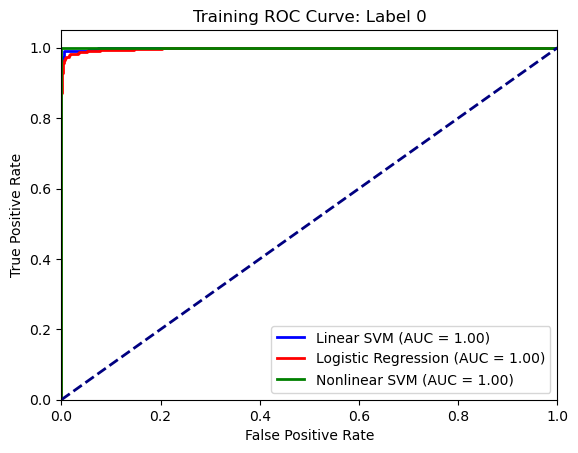

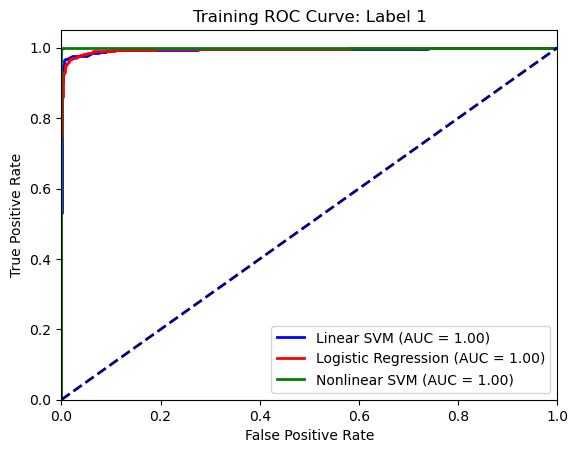

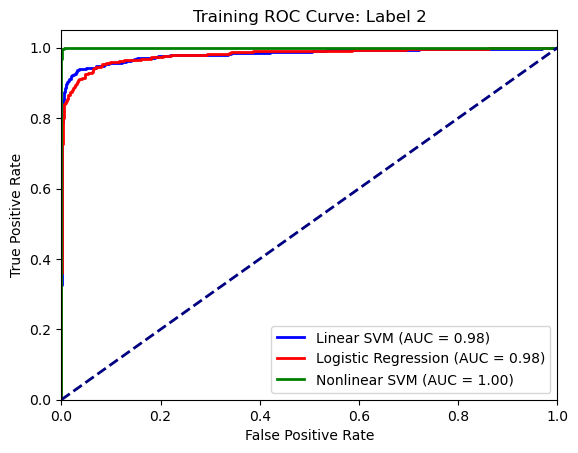

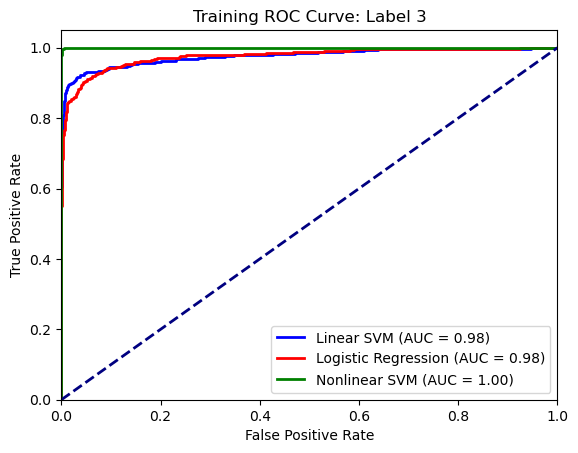

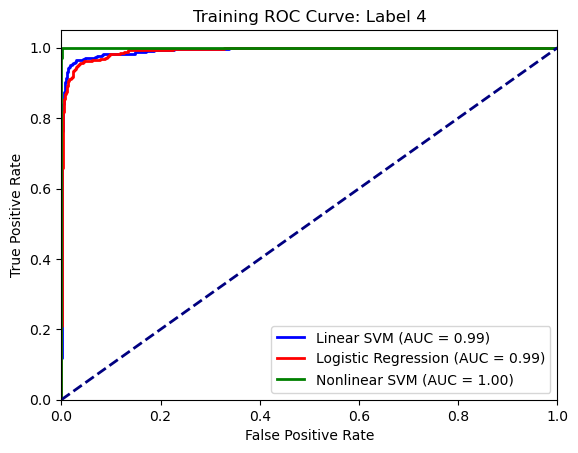

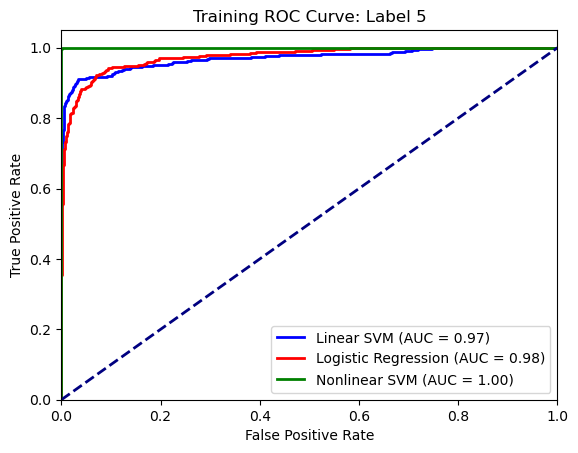

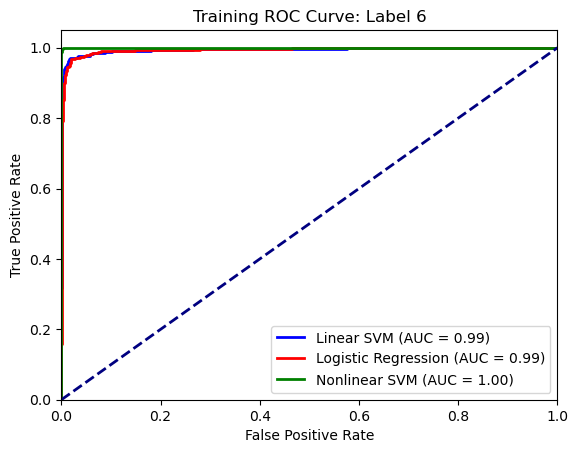

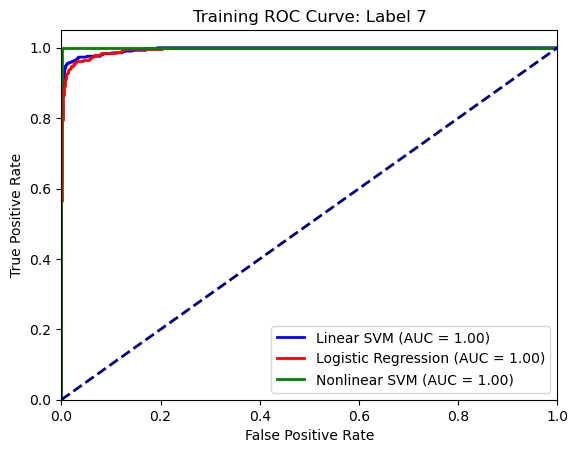

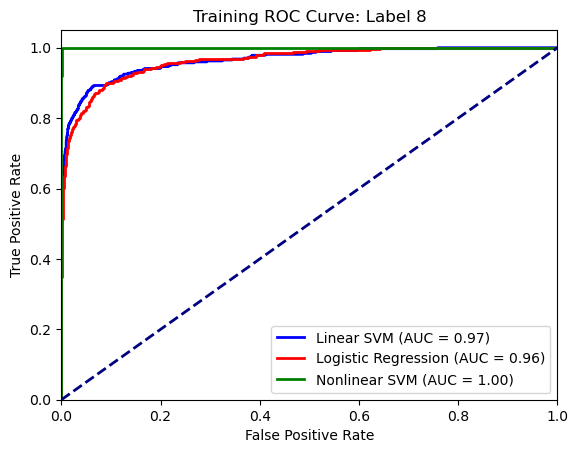

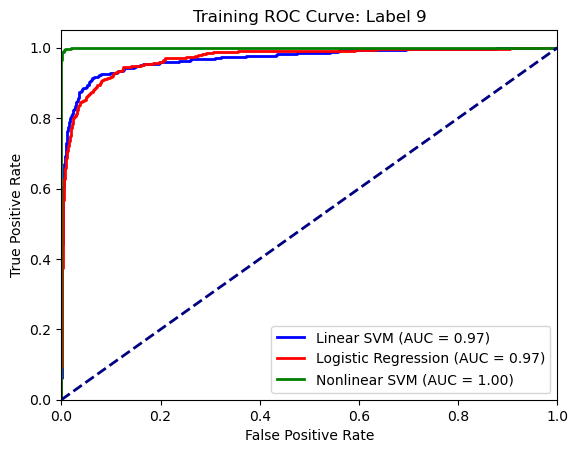

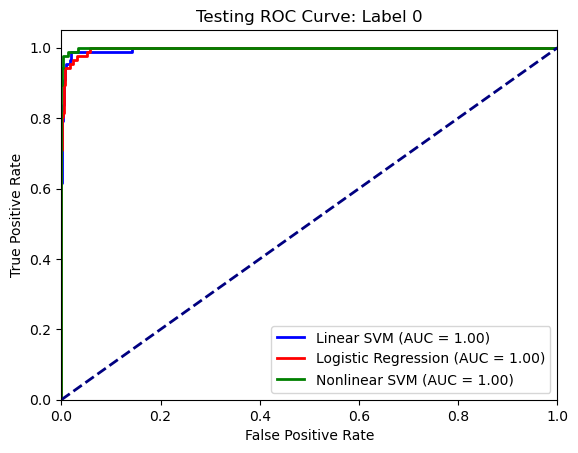

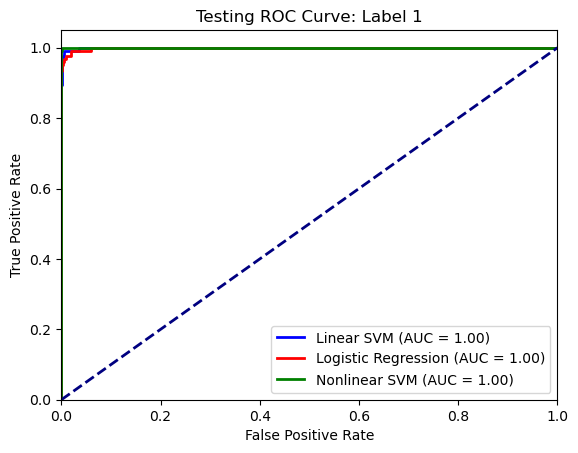

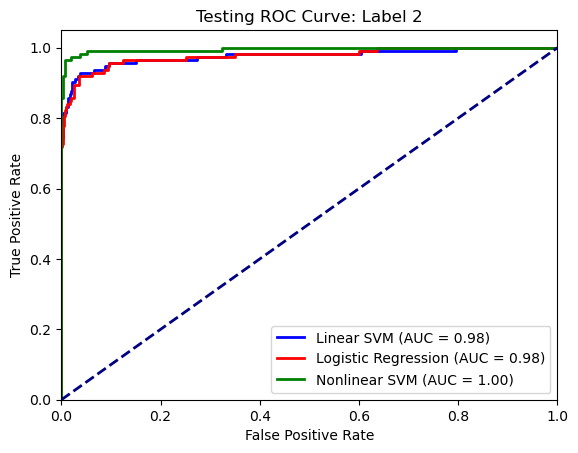

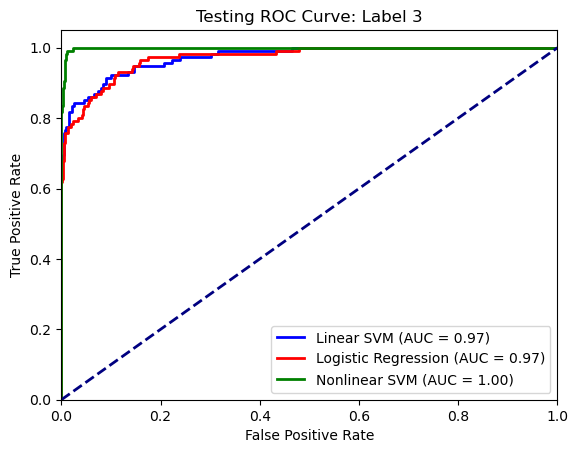

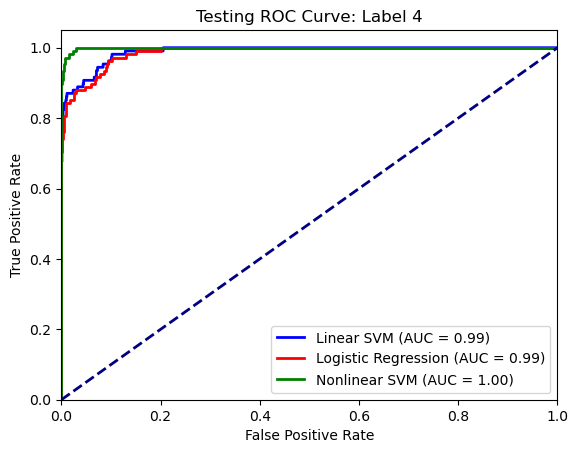

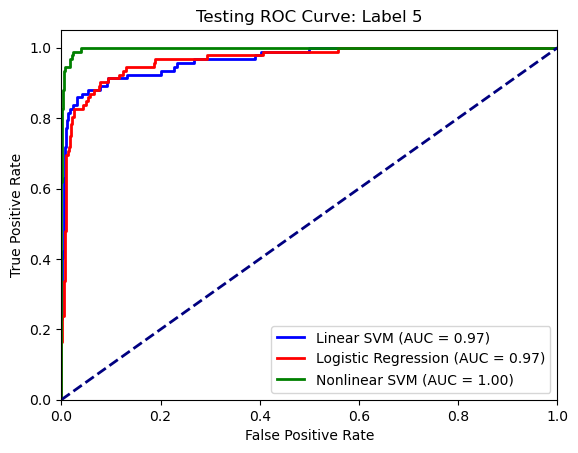

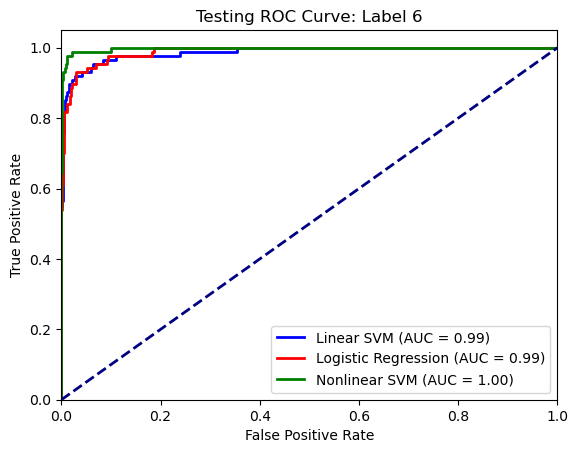

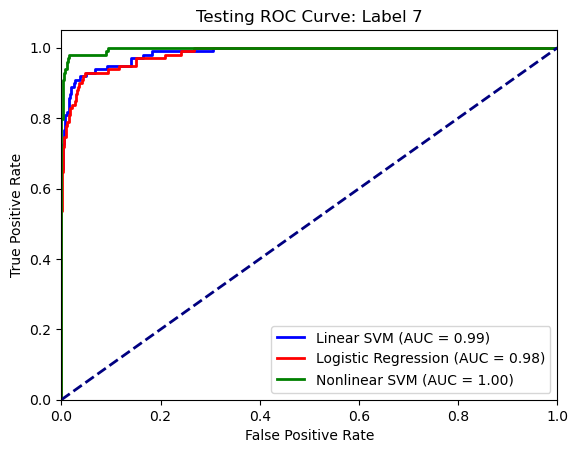

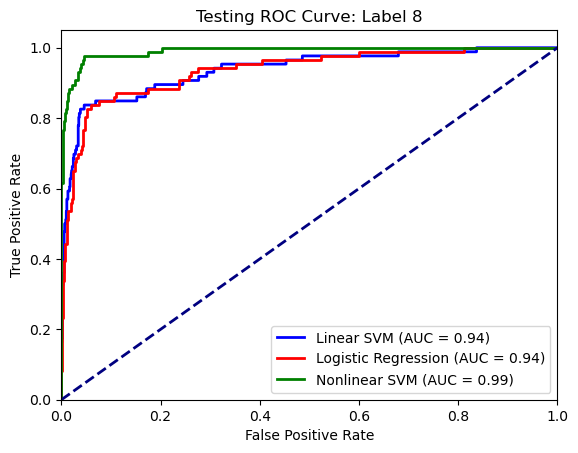

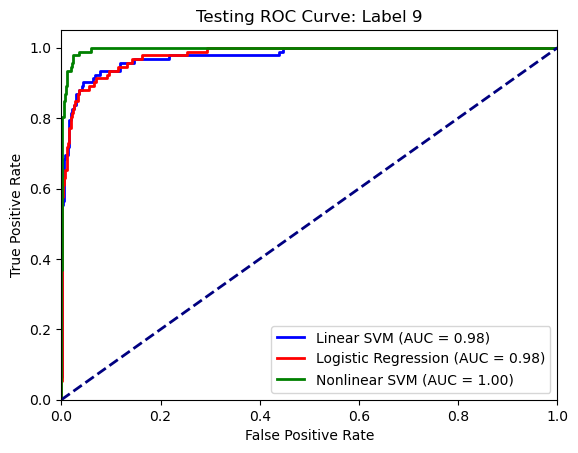

In [24]:
def plot_train_roc_curves(y_true, y_pred1, y_pred2, y_pred3, label):
    fpr1, tpr1, _ = roc_curve(y_true, y_pred1)
    roc_auc1 = auc(fpr1, tpr1)
    plt.plot(fpr1, tpr1, color='blue', lw=2, label='Linear SVM (AUC = %0.2f)' % roc_auc1)

    fpr2, tpr2, _ = roc_curve(y_true, y_pred2)
    roc_auc2 = auc(fpr2, tpr2)
    plt.plot(fpr2, tpr2, color='red', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc2)

    fpr3, tpr3, _ = roc_curve(y_true, y_pred3)
    roc_auc3 = auc(fpr3, tpr3)
    plt.plot(fpr3, tpr3, color='green', lw=2, label='Nonlinear SVM (AUC = %0.2f)' % roc_auc3)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Training ROC Curve: Label {}'.format(label))
    plt.legend(loc="lower right")
    plt.show()

def plot_test_roc_curves(y_true, y_pred1, y_pred2, y_pred3, label):
    fpr1, tpr1, _ = roc_curve(y_true, y_pred1)
    roc_auc1 = auc(fpr1, tpr1)
    plt.plot(fpr1, tpr1, color='blue', lw=2, label='Linear SVM (AUC = %0.2f)' % roc_auc1)

    fpr2, tpr2, _ = roc_curve(y_true, y_pred2)
    roc_auc2 = auc(fpr2, tpr2)
    plt.plot(fpr2, tpr2, color='red', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc2)

    fpr3, tpr3, _ = roc_curve(y_true, y_pred3)
    roc_auc3 = auc(fpr3, tpr3)
    plt.plot(fpr3, tpr3, color='green', lw=2, label='Nonlinear SVM (AUC = %0.2f)' % roc_auc3)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Testing ROC Curve: Label {}'.format(label))
    plt.legend(loc="lower right")
    plt.show()

# Plot the ROC curves for the train data
for label in range(10):
    y_true = one_versus_the_rest(train_samples_labels, label)
    y_pred1 = model1_train_predictions_array[label, :]
    y_pred2 = model2_train_predictions_array[label, :]
    y_pred3 = model3_train_predictions_array[label, :]
    plot_train_roc_curves(y_true, y_pred1, y_pred2, y_pred3, label)

# Plot the ROC curves for the test data
for label in range(10):
    y_true = one_versus_the_rest(test_samples_labels, label)
    y_pred1 = model1_test_predictions_array[label, :]
    y_pred2 = model2_test_predictions_array[label, :]
    y_pred3 = model3_test_predictions_array[label, :]
    plot_test_roc_curves(y_true, y_pred1, y_pred2, y_pred3, label)

**_Analysis_**:

By looking at the ROC curves of the three models for all classes, we can see that the three models all perform well across all classes, which means that these models are able to solve this classification problem well. Of the three models, the nonlinear SVM model achieves the best performance. The linear SVM model and logistic regression model perform similarly, and the nonlinear SVM model achieves a higher AUC score for all classes. This means that the nonlinear SVM model is able to distinguish between the positive and negative classes better than the other two models.